<a href="https://colab.research.google.com/github/Jung-Yong-Hun/Stock_Price_Prediction/blob/main/Algo_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Description : This program uses the dual moving average crossover to determine when to buy and sell stock

In [7]:
#Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [9]:
#Store the data
AAPL = pd.read_csv('AAPL.csv')
#Show the data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-10-02,2.682143,2.709643,2.653571,2.673571,2.295572,712639200
1,2006-10-03,2.658929,2.676786,2.613929,2.645714,2.271653,790708800
2,2006-10-04,2.646429,2.695000,2.612857,2.692143,2.311518,829082800
3,2006-10-05,2.661786,2.720000,2.647500,2.672500,2.294652,683883200
4,2006-10-06,2.657857,2.680000,2.636071,2.650714,2.275947,466958800
...,...,...,...,...,...,...,...
1318,2011-12-23,14.274643,14.413929,14.267500,14.404643,12.368061,269399200
1319,2011-12-27,14.396429,14.610357,14.393571,14.518929,12.466191,265076000
1320,2011-12-28,14.531786,14.580357,14.333571,14.380000,12.346903,228662000
1321,2011-12-29,14.407143,14.487500,14.303929,14.468571,12.422951,215978000


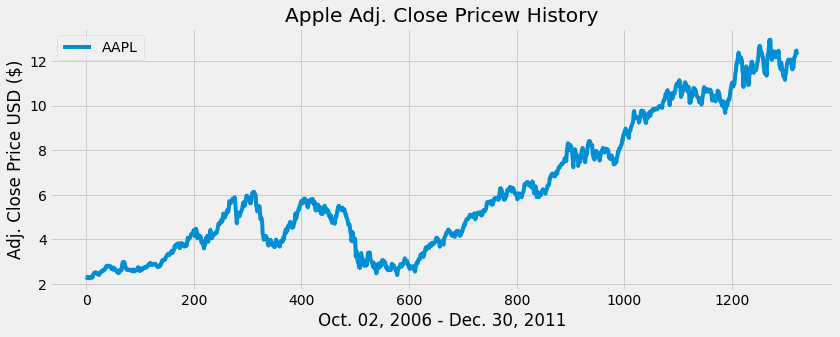

In [10]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Pricew History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [11]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] =AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1318,11.785205
1319,11.807601
1320,11.831499
1321,11.848150


In [12]:
#Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1318,11.893331
1319,11.902273
1320,11.911172
1321,11.927090


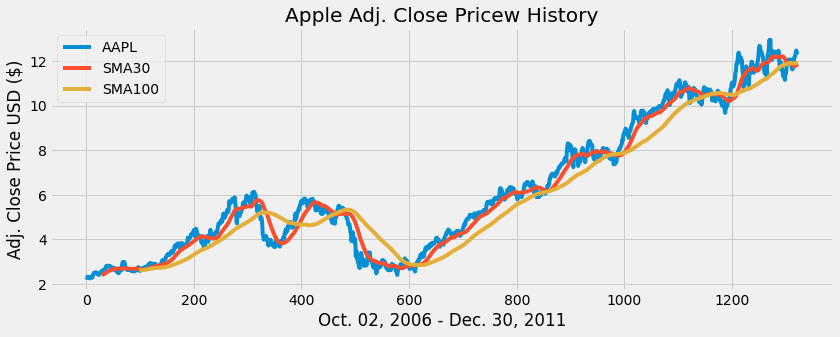

In [13]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label='SMA30')
plt.plot(SMA100['Adj Close'], label='SMA100')
plt.title('Apple Adj. Close Pricew History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()


In [14]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,2.295572,NaN,NaN
1,2.271653,NaN,NaN
2,2.311518,NaN,NaN
3,2.294652,NaN,NaN
4,2.275947,NaN,NaN
...,...,...,...
1318,12.368061,11.785205,11.893331
1319,12.466191,11.807601,11.902273
1320,12.346903,11.831499,11.911172
1321,12.422951,11.848150,11.927090


In [15]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
    sigPriceBuy = []
    sigPricesell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['AAPL'][i])
                sigPricesell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPricesell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPricesell.append(data['AAPL'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPricesell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPricesell.append(np.nan)
    return(sigPriceBuy,sigPricesell)

In [16]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [17]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy_signal_Price,Sell_Signal_Price
0,2.295572,NaN,NaN,NaN,NaN
1,2.271653,NaN,NaN,NaN,NaN
2,2.311518,NaN,NaN,NaN,NaN
3,2.294652,NaN,NaN,NaN,NaN
4,2.275947,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1318,12.368061,11.785205,11.893331,NaN,NaN
1319,12.466191,11.807601,11.902273,NaN,NaN
1320,12.346903,11.831499,11.911172,NaN,NaN
1321,12.422951,11.848150,11.927090,NaN,NaN


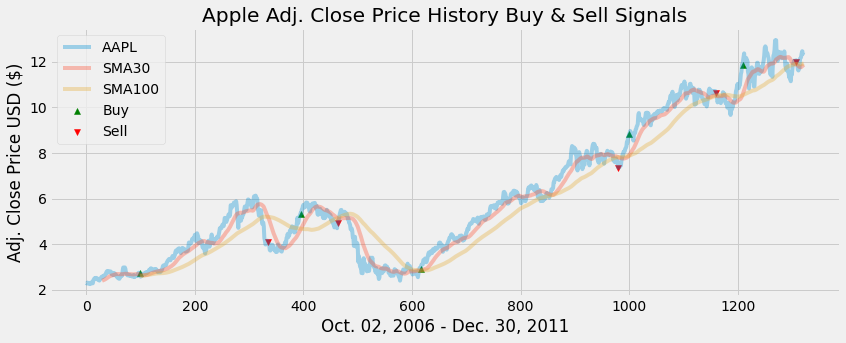

In [18]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_signal_Price'], label= 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label= 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()